# **Practical No. 4**

# **Developing a recommendation system using collaborative filtering or deep learning approaches.**



**Using movielens dataset**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load MovieLens 100k dataset from URL
#url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
url='/content/u.data'


In [ ]:
columns = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=columns)

In [ ]:
df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')

In [ ]:
df.head(5)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
df.tail(5)

,user_id,item_id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


returns all the unique user IDs in the user_id column of the DataFrame df

returns a NumPy array containing no duplicates, showing each user ID once.

In [ ]:
# Map user_id and item_id to zero-based indices
user_ids = df['user_id'].unique()
item_ids = df['item_id'].unique()

In [ ]:
df['item_id'].unique()

array([ 242,  302,  377, ..., 1637, 1630, 1641])

creates a mapping (dictionary) from each user ID to a unique index.

It’s useful when your user IDs are not already numbered from 0 to n-1
required for embedding layers.

In [ ]:
user2idx = {user: idx for idx, user in enumerate(user_ids)}
item2idx = {item: idx for idx, item in enumerate(item_ids)}

If data is prepared for a neural network (e.g., matrix factorization), and

user IDs or item IDs are non-sequential (e.g., 1002, 541, 999)

then Map original IDs to indices (above step) and

Apply the mapping to your DataFrame


In [ ]:
df['user_id'] = df['user_id'].map(user2idx)
df['item_id'] = df['item_id'].map(item2idx)

In [ ]:
df['user_id']

,user_id
0,0
1,1
2,2
3,3
4,4
...,...
99995,875
99996,708
99997,37
99998,58


In [ ]:
num_users = len(user2idx)
num_items = len(item2idx)

In [ ]:
num_users, num_items

(943, 1682)

In [ ]:
# Split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
#optional
# Further split train into train + validation sets
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

In [ ]:
# Prepare training and test inputs
X_train = [train['user_id'].values, train['item_id'].values]
y_train = train['rating'].values.astype(np.float32)

In [ ]:
#optional

X_val = [val_df['user_id'].values, val_df['item_id'].values]
y_val = val_df['rating'].values.astype(np.float32)

In [ ]:
X_test = [test['user_id'].values, test['item_id'].values]
y_test = test['rating'].values.astype(np.float32)

In [ ]:
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))
embedding_size=20

embeddings_initializer='he_normal' - initializes the weights using He normal initialization (good for ReLU activations)

In [ ]:
user_embedding = Embedding(num_users, embedding_size, embeddings_initializer='he_normal')(user_input)
item_embedding = Embedding(num_items, embedding_size, embeddings_initializer='he_normal')(item_input)

In [ ]:
dot_product = Dot(axes=2)([user_embedding, item_embedding])
dot_product = Flatten()(dot_product)

In [ ]:
model = Model(inputs=[user_input, item_input], outputs=dot_product)
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Train with validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=1024,
    verbose=1
)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13.6858 - val_loss: 13.7999
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6947 - val_loss: 13.4606
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.9592 - val_loss: 10.4464
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9446 - val_loss: 4.9096
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0624 - val_loss: 2.4339
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.2235 - val_loss: 1.6812
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5833 - val_loss: 1.3465
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2858 - val_loss: 1.1673
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1460 - val_loss: 1.0598
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0434 - val_loss: 0.9929
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9888 - val_loss: 0.9451
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9354 - 

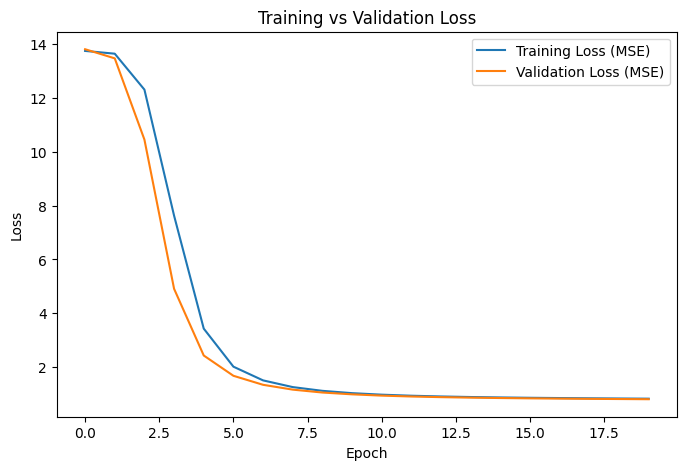

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

history object contains training metrics logged over each epoch:

history.history is like a dictionary

eg.

{
    'loss': [0.693, 0.589, 0.432, ...],

    'accuracy': [0.50, 0.65, 0.75, ...],
}

history.history['loss'][0] returns the loss from the first epoch.

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7186
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 1/10 - Train Loss: 0.7218 - Test RMSE: 0.9270
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7163
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 2/10 - Train Loss: 0.7169 - Test RMSE: 0.9266
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7052
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 3/10 - Train Loss: 0.7119 - Test RMSE: 0.9257
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 4/10 - Train Loss: 0.7070 - Test RMSE: 0.9254
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6975
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5/10 - Train Loss: 0.7021 - Test RMSE: 0.9247
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6895
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 6/10 - Train Loss: 0.6973 - Test RMSE: 0.9245
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6937
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 7/10 - Train Loss: 0.692

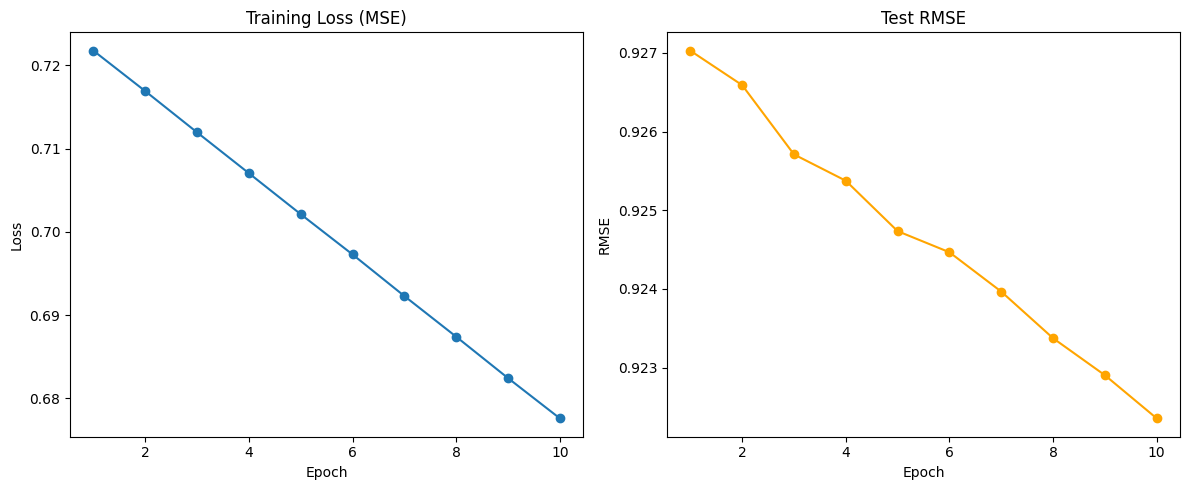

In [ ]:
# metrics evaluation
#create lists
train_losses = []
test_rmse = []

epochs = 10
batch_size = 1024

for epoch in range(epochs):
    # Train for one epoch
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=1)
    train_loss = history.history['loss'][0]
    train_losses.append(train_loss)

    # Predict on test set
    pred_test = model.predict(X_test, batch_size=batch_size)
    rmse = np.sqrt(mean_squared_error(y_test, pred_test))
    test_rmse.append(rmse)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Test RMSE: {rmse:.4f}")

# Plot training loss and test RMSE
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.title('Training Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), test_rmse, marker='o', color='orange')
plt.title('Test RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()